In [1]:
from sklearn.datasets import make_classification
X,y = make_classification(n_classes= 2,n_samples=400,n_redundant=0,random_state=1)

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
X_train.shape,X_test.shape

((280, 20), (120, 20))

In [6]:
y_train.shape,y_test.shape

((280,), (120,))

In [7]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
y_preds

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

# Evaluation

In [8]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

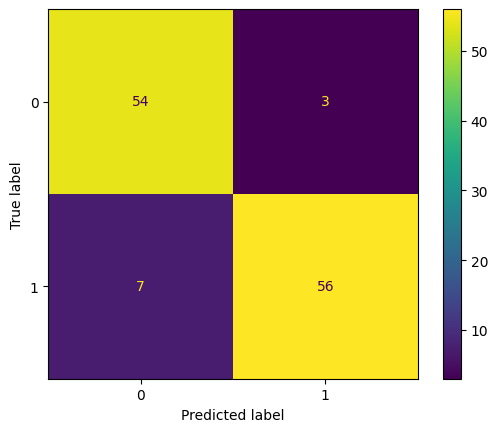

In [9]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [10]:
l=confusion_matrix(y_preds,y_test)
l

array([[54,  7],
       [ 3, 56]], dtype=int64)

# Recall / Sensitivity

In [11]:
# TP /(TP + FN)
print("Calculated Recall ",l[1,1]/(l[1,1]+l[0,1]))
recall_score(y_test,y_preds)

Calculated Recall  0.8888888888888888


0.8888888888888888

# Precision / Specificity

In [12]:
# TP /(TP + FP)
print("Calculted Precision",l[1,1]/(l[1,1]+l[1,0]))
precision_score(y_test,y_preds)

Calculted Precision 0.9491525423728814


0.9491525423728814

# Accuracy Score

In [13]:
 #Accuracy_score = (TP + TN) / (TP+TN+FN+FP)
print("Calculated Accuracy Score",(l[0,0]+l[1,1])/(l[0,0]+l[1,1]+l[1,0]+l[0,1]))
accuracy_score(y_preds,y_test)

Calculated Accuracy Score 0.9166666666666666


0.9166666666666666

In [14]:
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        61
           1       0.89      0.95      0.92        59

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



# F1-Score

In [15]:
 # F1-Score = 2*Precision * Recall/(Precision + Recall)
numerator = 2 * precision_score(y_test,y_preds) * recall_score(y_test,y_preds)
denominator = precision_score(y_test,y_preds) + recall_score(y_test,y_preds)

print("Calculted f1_score",numerator/denominator)
f1_score(y_test,y_preds)

Calculted f1_score 0.9180327868852458


0.9180327868852458

# ROC  Curve

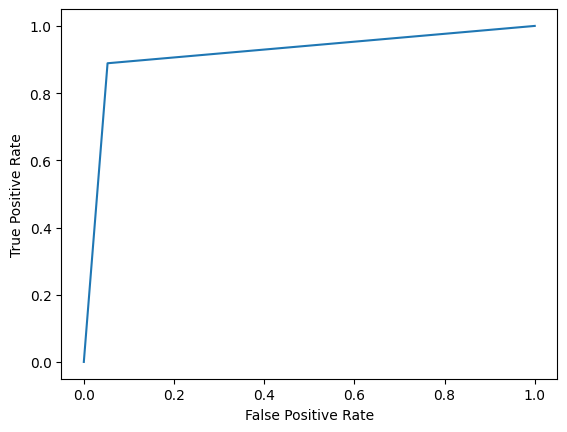

In [16]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred = model.predict_proba(X_test)[:,1]
y_pred = model.predict_proba(X_test)[::,1]
fpr, tpr,_= metrics.roc_curve(y_test,  y_pred)

# #create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ROC score

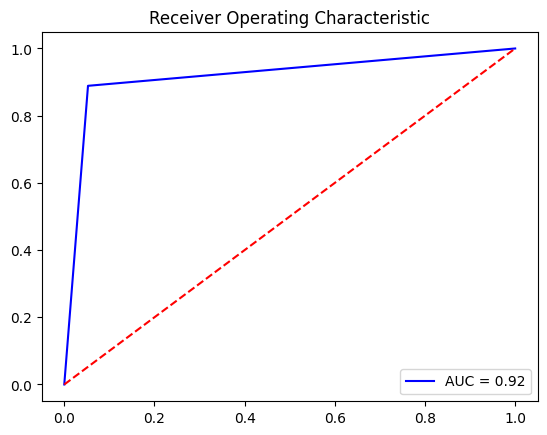

In [17]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--');

In [18]:
roc_auc

0.9181286549707602

# Step By Step ROC curve & Score

In [19]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [20]:
y_pred = model.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred)
print("True Positive Rate:",tpr,"False Positive Rate:",fpr)

True Positive Rate: [0.         0.88888889 1.        ] False Positive Rate: [0.         0.05263158 1.        ]


In [21]:
roc_score= metrics.auc(fpr,tpr)
roc_score

0.9181286549707602

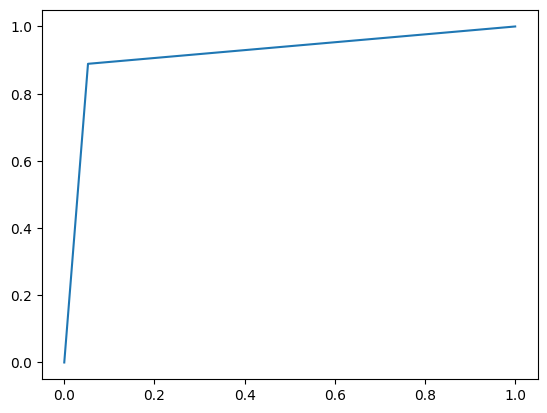

In [22]:
import matplotlib.pyplot as plt
#Simple Plot
plt.plot(fpr,tpr);

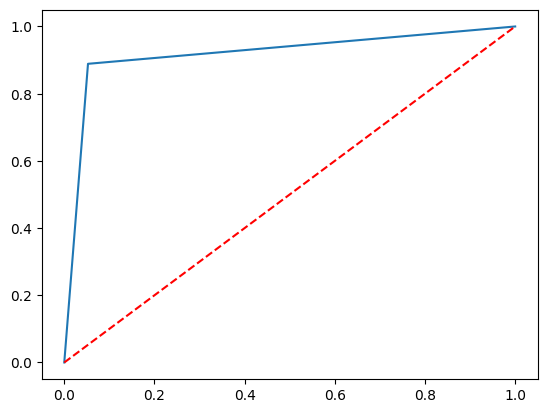

In [23]:
#Adding diagnol line to the plot
plt.plot(fpr,tpr)
# plt.plot([0,1],[0,1],ls="--",color="r")
plt.plot([0,1],[0,1],"r--");

In [24]:
#Adding the auc score
auc_score = metrics.auc(fpr,tpr)
auc_score


0.9181286549707602

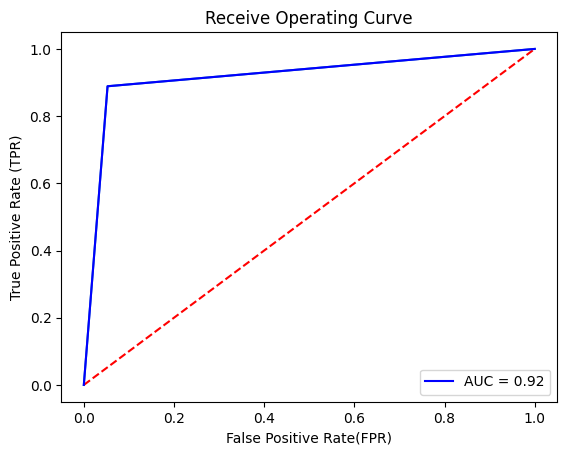

In [25]:
#Adding diagnol line to the plot
plt.plot(fpr,tpr)
# plt.plot([0,1],[0,1],ls="--",color="r")
plt.plot([0,1],[0,1],"r--")
#Adding the auc score
auc_score = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_score)
#Diagnol Line
plt.legend(loc = 'lower right')
plt.title("Receive Operating Curve")
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)");

In [26]:
#Multple Models
# from sklearn.metrics import plot_roc_curve
# disp=plot_roc_cuve(model1,X_test,y_test)
# plot_roc_curve(model2,X_test,y_test,ax=disp.ax_);
# plot_roc_curve(model3,X_test,y_test,ax=disp.ax_);